In [2]:
import prediect

In [4]:
model = prediect.init_CSRNet()

In [5]:
import cv2

In [13]:
img = cv2.imread('2847.jpg')

In [14]:
img.shape

(576, 704, 3)

In [10]:
import torch
from torch.autograd import Variable
from torchvision import datasets, transforms

In [15]:
model.eval()
    
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]),
    ])

img = transform(img)
img = img.cuda()
img = Variable(torch.unsqueeze(img,dim=0).float())
output = model(img)

Exception ignored in: <function tqdm.__del__ at 0x7fc3ff9a84c0>
Traceback (most recent call last):
  File "/home/yeshang/.virtualenvs/yolov5/lib/python3.8/site-packages/tqdm/std.py", line 1087, in __del__
    self.close()
  File "/home/yeshang/.virtualenvs/yolov5/lib/python3.8/site-packages/tqdm/notebook.py", line 255, in close
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


In [20]:
output[0][0].data.shape

torch.Size([72, 88])

In [23]:
import matplotlib as mpl
from matplotlib import pyplot as plt

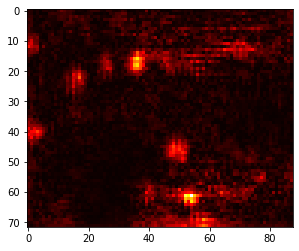

In [70]:
plt.imshow(np.abs(output[0][0].cpu().detach().numpy()), cmap=mpl.cm.hot)
plt.show()

In [30]:
import numpy as np

In [65]:
output[0][0].cpu().detach().numpy().min()

-0.0034531825

In [91]:
nums[:100].reshape(25, 4).mean(axis=0)

array([21.12, 21.2 , 20.88, 21.16])

In [75]:
import json

In [81]:
with open('result.json', 'w') as f:
    json.dump(np.zeros(10, dtype=np.int).tolist(), f)

In [92]:
video = cv2.VideoCapture('../../dataset/Subway/06.mp4')
size = video.get(cv2.CAP_PROP_FRAME_COUNT)
nums = np.zeros(int(size))
ret, frame = video.read()
i = 0
while ret:
    img = frame
    img = transform(img)
    img = img.cuda()
    img = Variable(torch.unsqueeze(img,dim=0).float())
    output = model(img)
    num = int(abs(output.data.sum()).item())
    nums[i] = num
#     fig = plt.gcf()
#     fig.clf()
#     plt.imshow(np.abs(output[0][0].cpu().detach().numpy()), cmap=mpl.cm.hot)
#     fig.set_size_inches(8.8/3, 7.2/3) #dpi = 300, output = 700*700 pixels
#     plt.gca().xaxis.set_major_locator(plt.NullLocator())
#     plt.gca().yaxis.set_major_locator(plt.NullLocator())
#     plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
#     plt.margins(0,0)
#     plt.savefig('result/{}.jpg'.format(i), pad_inches=0)
    i += 1
    ret, frame = video.read()
with open('result.json', 'w') as f:
    json.dump(nums.tolist(), f)